In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pmd

In [45]:
df=pd.read_csv("energy_consumption.csv",parse_dates=True,index_col="timeStamp")
df.shape

(49205, 3)

In [46]:
df.isnull().sum()

demand     81
precip    230
temp      186
dtype: int64

In [47]:
df['demand']=df['demand'].fillna(method='ffill')

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

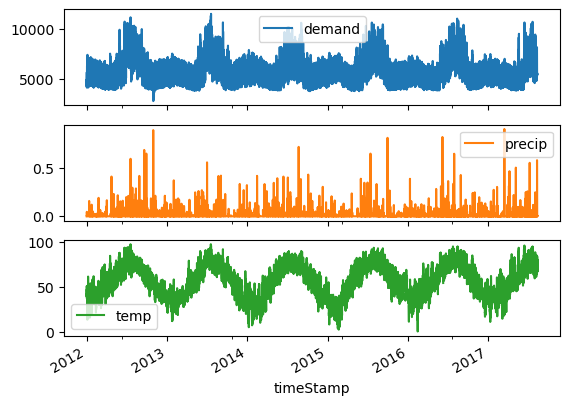

In [53]:
df.plot(subplots=True)

In [ ]:
# plotting acf and pacf plots 

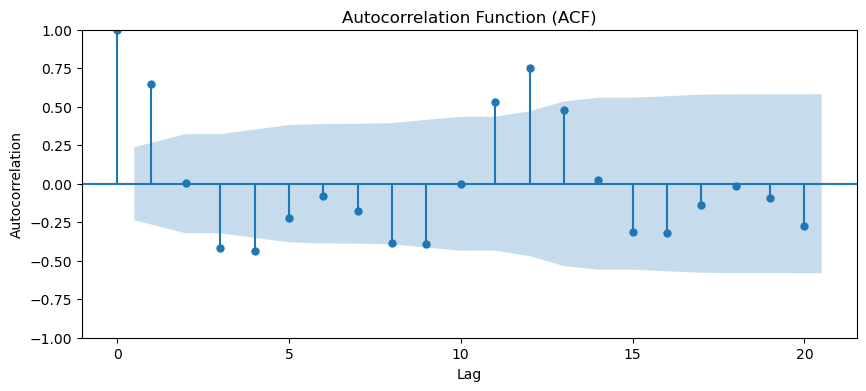

D:\Users\Anuj\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


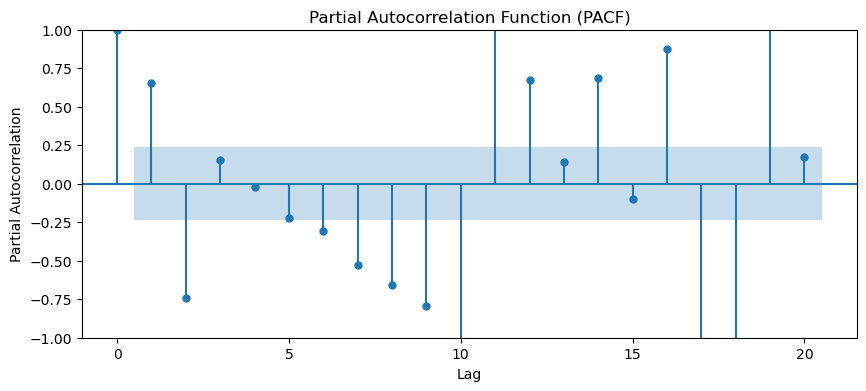

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(t_df["demand"], lags=20, ax=ax)  # Set the number of lags to display (e.g., 20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 4))
plot_pacf(t_df["demand"], lags=20, ax=ax)  # Set the number of lags to display (e.g., 20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [ ]:
# dicky fuller test to check the stationarity

In [52]:
from statsmodels.tsa.stattools import adfuller
# Perform Dickey-Fuller test
result = adfuller(df["demand"])

# Extract test statistics and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")



Test Statistic: -10.965605047107847
P-value: 8.118543986782308e-20


In [ ]:
# as p-value is less than the significance level(0.05). so we reject the null hypothesis and w can say that data is stationary

In [63]:
t_df=df.resample('M').mean()

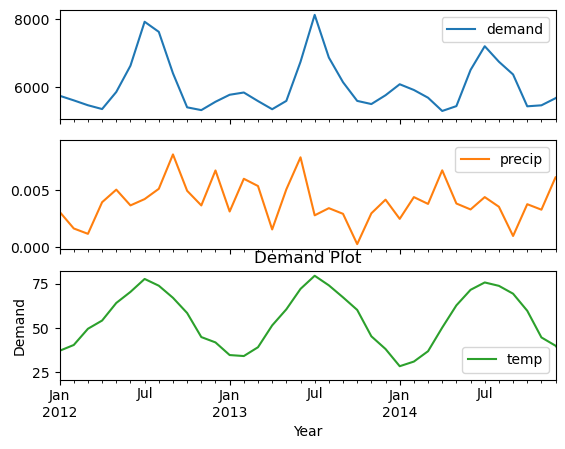

In [66]:
t_df.plot(subplots=True)
plt.xlim(pd.Timestamp('2012-01-01'), pd.Timestamp('2014-12-31'))
plt.xlabel('Year')
plt.ylabel('Demand')
plt.title('Demand Plot')

# Show the plot
plt.show()

In [222]:
model = pmd.auto_arima(t_df['demand'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.86 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.61 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.326, Time=1.32 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1035.474, Time=1.89 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.57 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1013.800, Time=1.32 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.058, Time=0.67 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1

In [108]:
split_date = '2017-05-1'  

train_data = t_df.loc[:split_date]
test_data = t_df.loc[split_date:]

In [109]:
test_data

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002272,76.395270
2017-08-31,6711.707542,0.008961,73.730258


In [110]:
model.fit(train_data['demand'])

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [125]:
forecast=model.predict(n_periods=4,return_conf_int=True)

In [126]:
forecast_df = pd.DataFrame(forecast[0],index = test_data.index,columns=['Prediction'])

In [127]:
forecast_df

,Prediction
timeStamp,
2017-05-31,5320.832808
2017-06-30,6194.150615
2017-07-31,7184.108107
2017-08-31,7297.999611


<AxesSubplot:xlabel='timeStamp'>

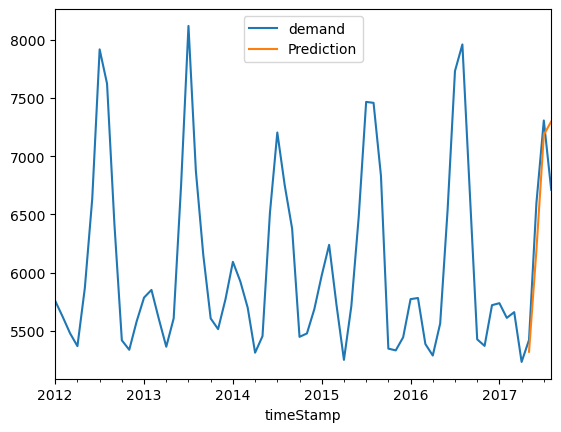

In [128]:
pd.concat([t_df['demand'],forecast_df],axis=1).plot()

In [208]:
forecast1=model.predict(n_periods=8, return_conf_int=True)
forecast1_range=pd.date_range(start='2017-05-31',periods=8,freq='M' )

In [209]:
forecast1_df=pd.DataFrame(forecast1[0],index=forecast1_range,columns=['Prediction'])

In [211]:
forecast1_df

,Prediction
2017-05-31,5320.832808
2017-06-30,6194.150615
2017-07-31,7184.108107
2017-08-31,7297.999611
2017-09-30,6401.927303
2017-10-31,5789.924232
2017-11-30,5693.039673
2017-12-31,5951.573126


<AxesSubplot:>

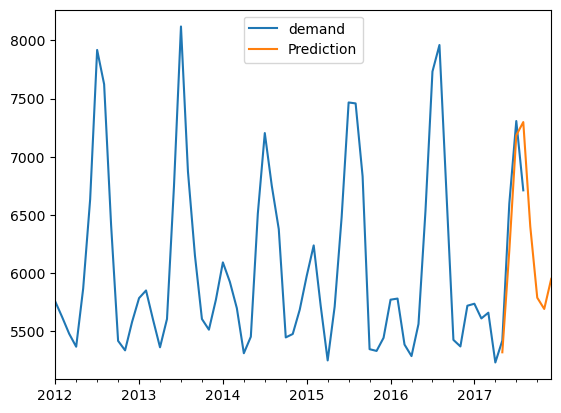

In [212]:
pd.concat([t_df["demand"],forecast1_df],axis=1).plot()